In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Hour 4: Hierarchical Clustering Session: Mall Customer Segmentation

## 1. Data Loading and Exploration

Load the Mall Customer Segmentation Data from Kaggle. Explore the dataset's features and basic statistics. Visualize the data using scatter plots and histograms.

In [ ]:
# Load the Mall Customer Segmentation Data
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
# Basic exploration
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

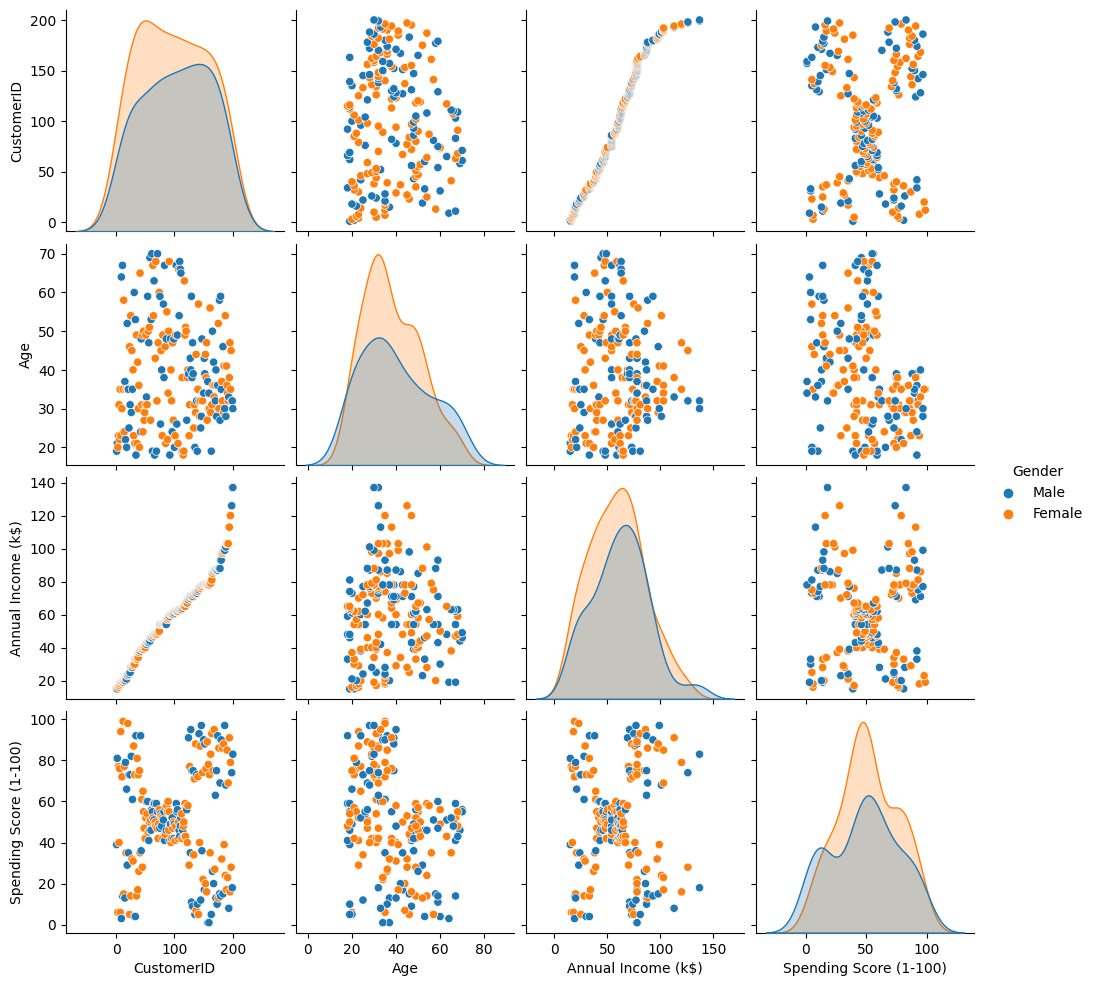

In [ ]:
# Visualizations
sns.pairplot(data, hue='Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


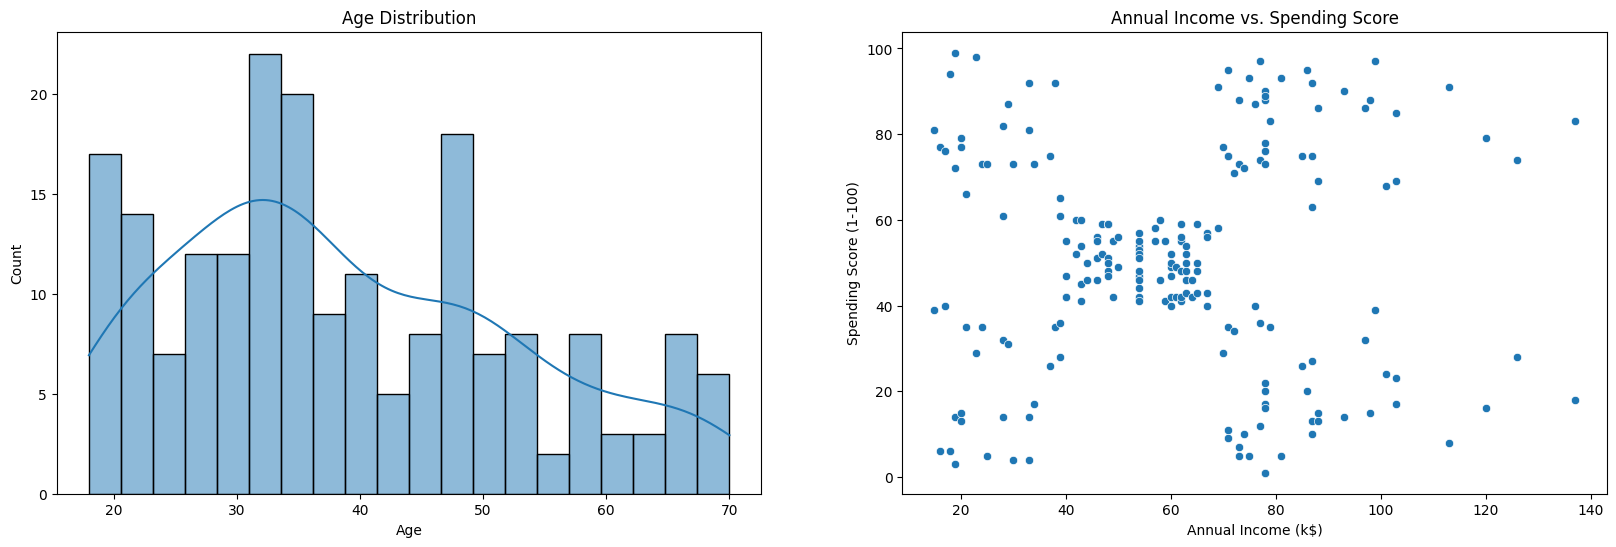

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, ax=axes[1])
axes[1].set_title('Annual Income vs. Spending Score')

plt.show()

## 2. Data Preprocessing

Handle any missing values or outliers. Scale the data using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 3. Hierarchical Clustering Implementation

Apply hierarchical clustering using different linkage methods (single, complete, ward). Experiment with different distance metrics (Euclidean, Manhattan). Visualize the resulting dendrograms.

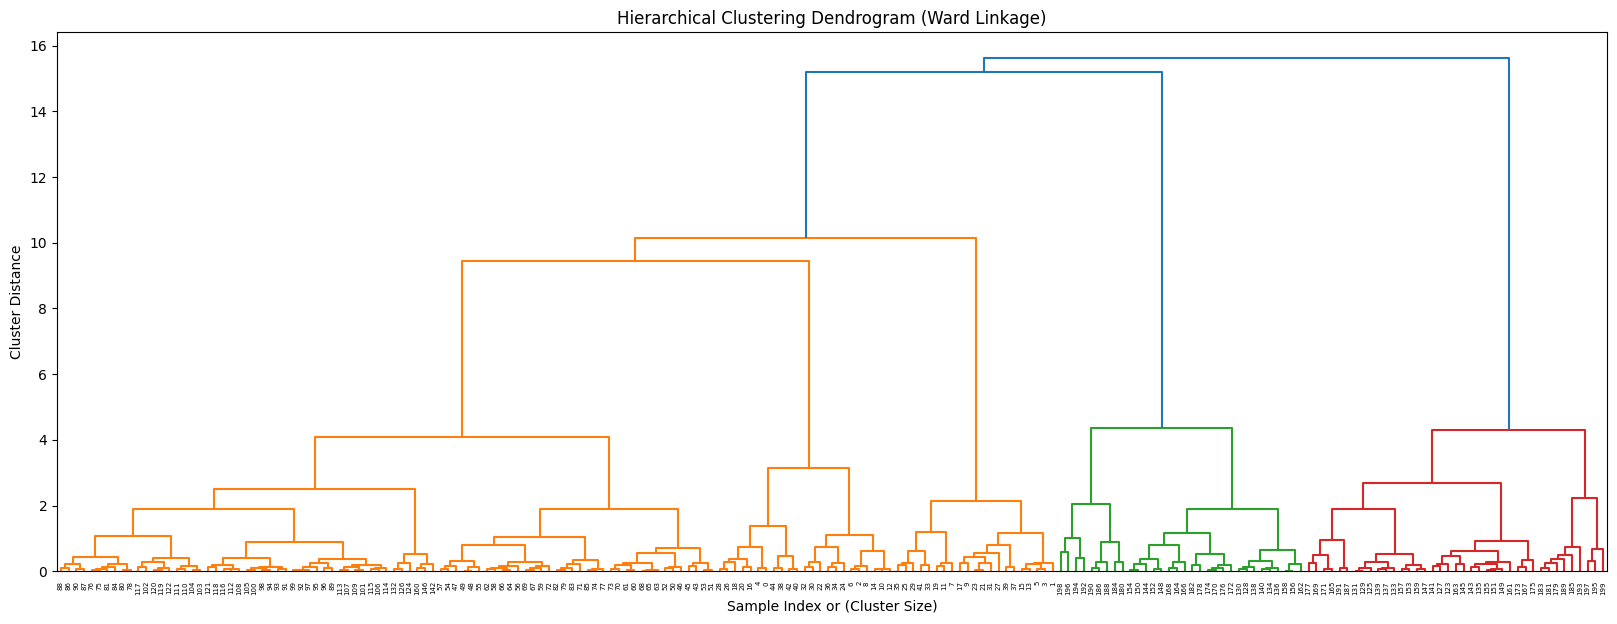

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ward linkage
linked_ward = linkage(X_scaled, 'ward')
plt.figure(figsize=(20, 7))
dendrogram(linked_ward, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Cluster Distance')
plt.show()

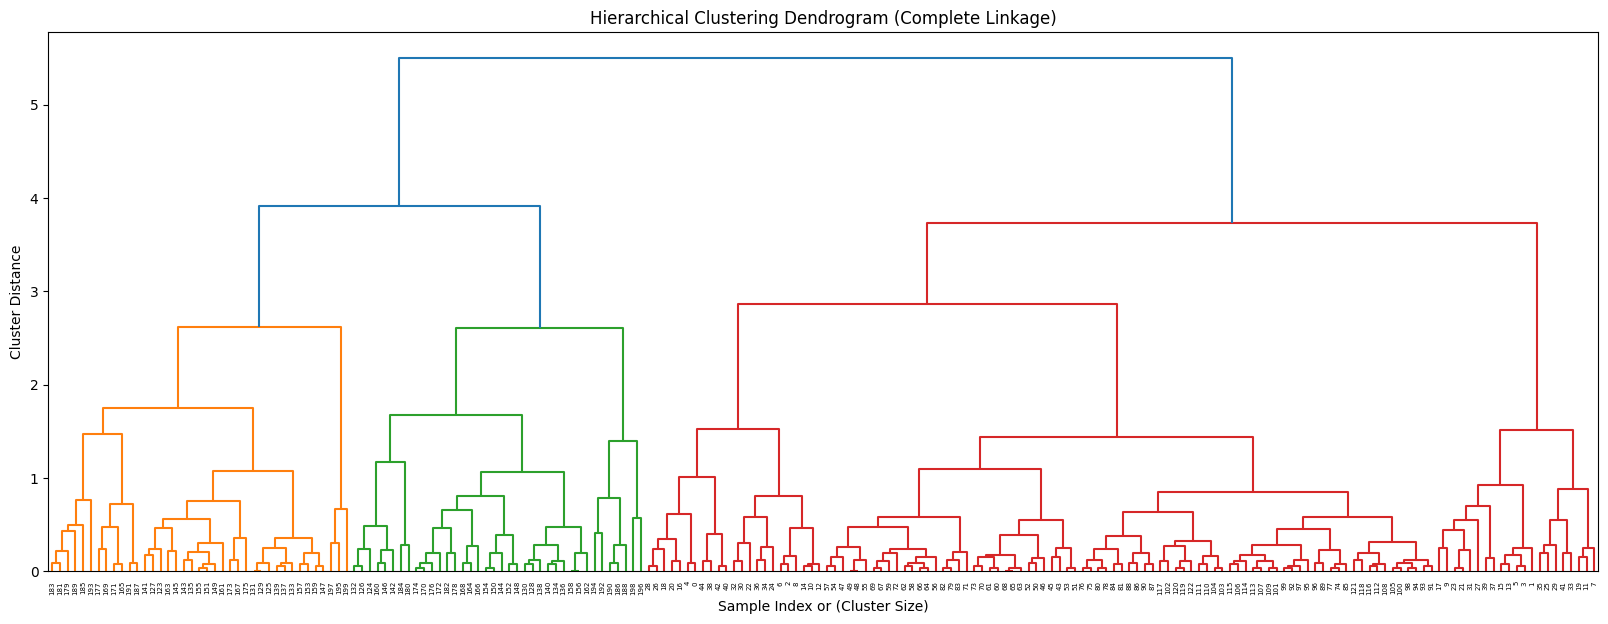

In [ ]:
# Complete linkage
linked_complete = linkage(X_scaled, 'complete')
plt.figure(figsize=(20, 7))
dendrogram(linked_complete, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Cluster Distance')
plt.show()



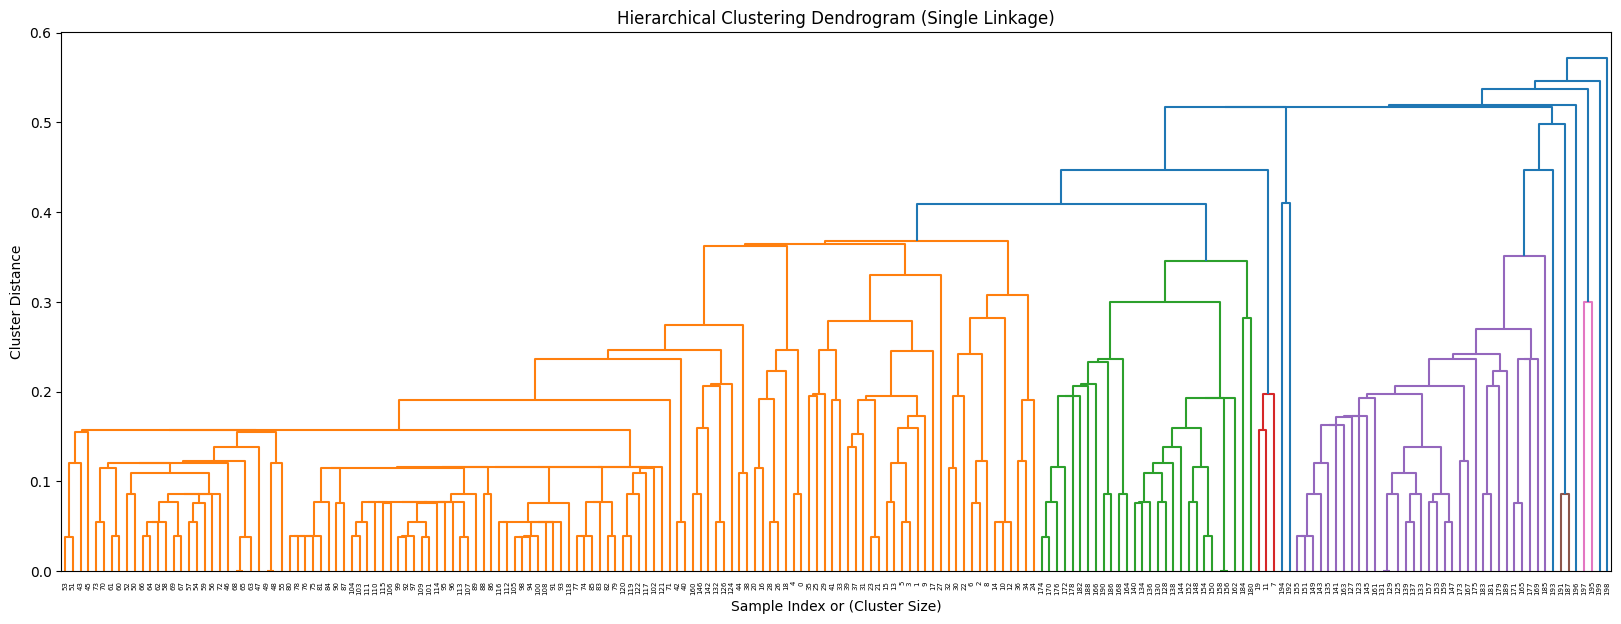

In [ ]:
# Single linkage
linked_single = linkage(X_scaled, 'single')
plt.figure(figsize=(20, 7))
dendrogram(linked_single, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Cluster Distance')
plt.show()

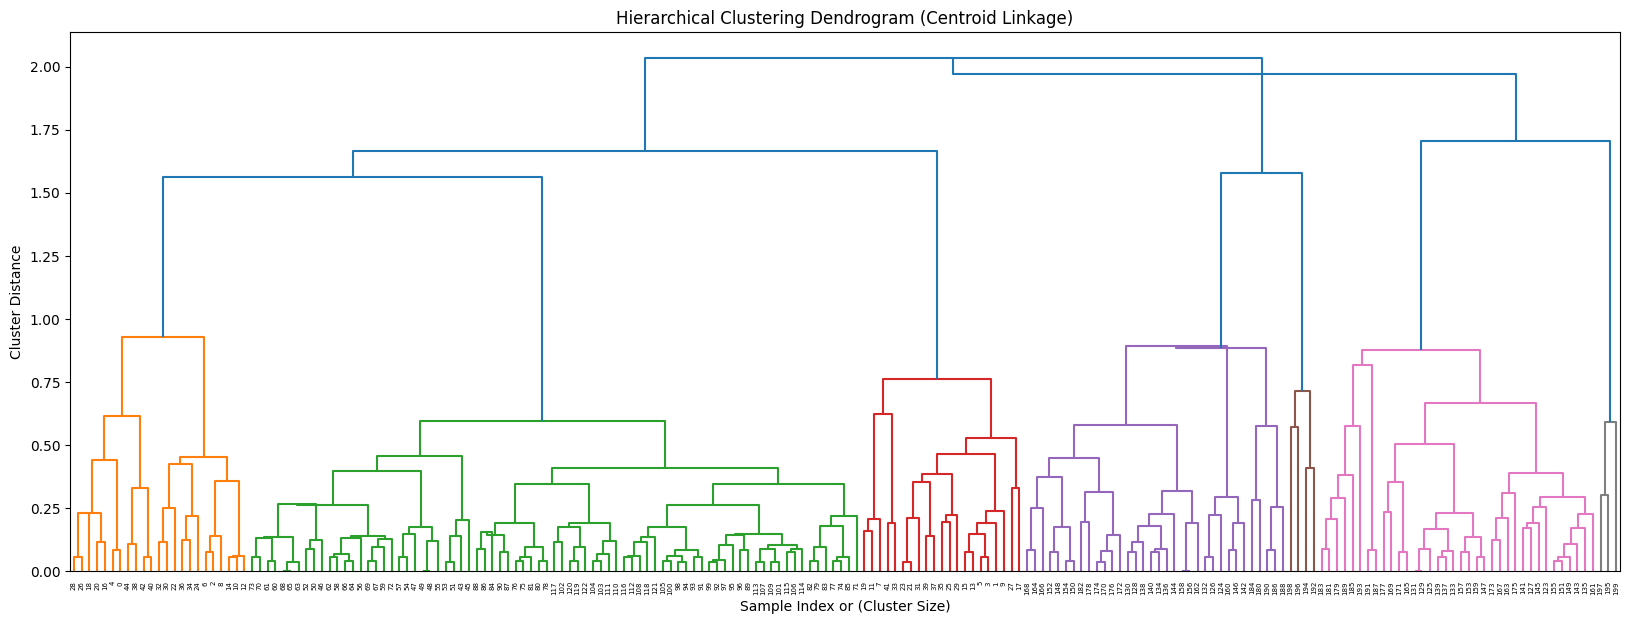

In [ ]:
# Single linkage
linked_single = linkage(X_scaled, 'centroid')
plt.figure(figsize=(20, 7))
dendrogram(linked_single, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Cluster Distance')
plt.show()

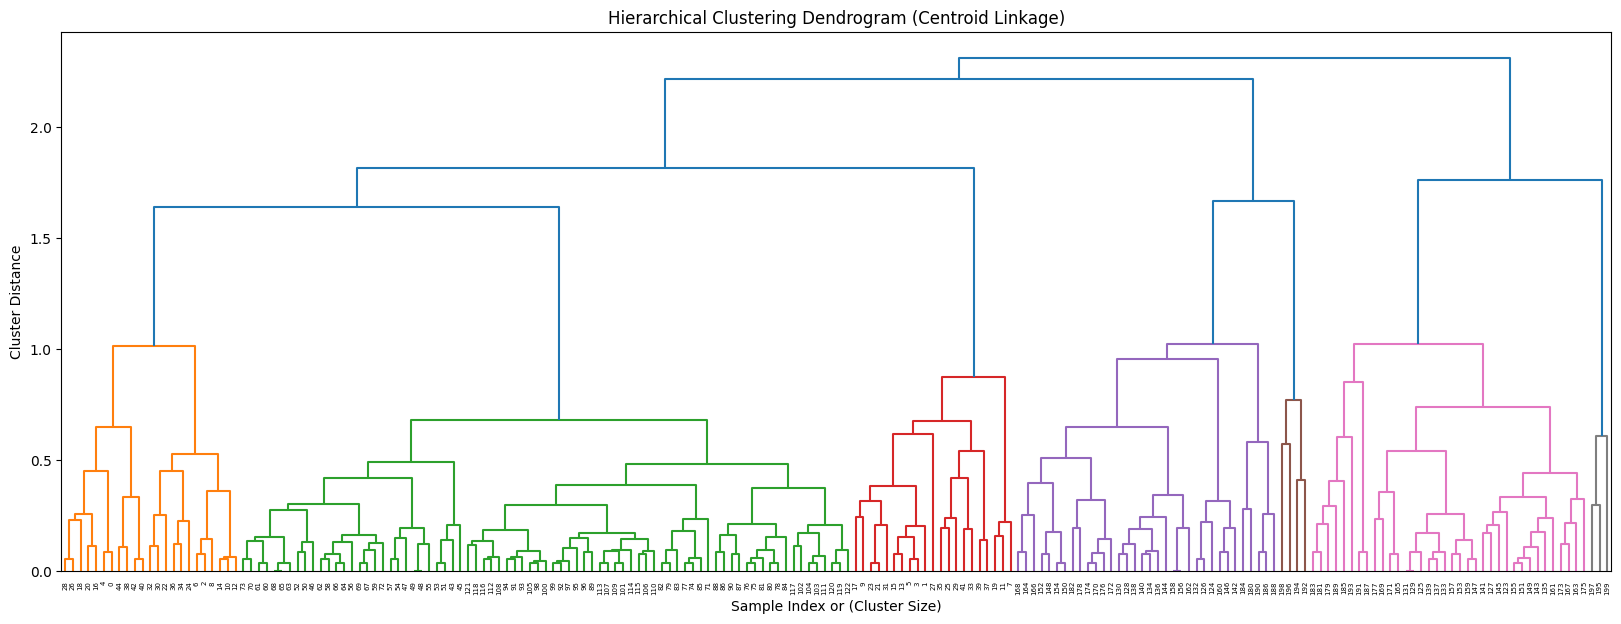

In [ ]:
# Single linkage
linked_single = linkage(X_scaled, 'average')
plt.figure(figsize=(20, 7))
dendrogram(linked_single, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Centroid Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Cluster Distance')
plt.show()

## 4. Dendrogram Analysis and Cluster Selection

Analyze the dendrograms to identify potential clusters. Use dendrogram pruning and cutting techniques. Calculate the cophenetic correlation coefficient to evaluate the dendrograms.

In [ ]:
from scipy.cluster.hierarchy import cophenet, cut_tree
from scipy.spatial.distance import pdist

# Cophenetic correlation
c_ward, coph_dist_ward = cophenet(linked_ward, pdist(X_scaled))
print(f"Cophenetic Correlation (Ward): {c_ward}")

c_complete, coph_dist_complete = cophenet(linked_complete, pdist(X_scaled))
print(f"Cophenetic Correlation (Complete): {c_complete}")

c_single, coph_dist_single = cophenet(linked_single, pdist(X_scaled))
print(f"Cophenetic Correlation (Single): {c_single}")

# Cut the dendrogram to get clusters
clusters = cut_tree(linked_ward, n_clusters=5).reshape(-1,)
print("Clusters:", clusters)

Cophenetic Correlation (Ward): 0.72091281930771
Cophenetic Correlation (Complete): 0.6669843292956471
Cophenetic Correlation (Single): 0.7173982395337909
Clusters: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 4 3 2 3
 4 3 4 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


## 5. Cluster Interpretation and Visualization

Interpret the characteristics of the identified clusters. Visualize the clusters using scatter plots and other appropriate techniques. Relate the clusters to customer segments.

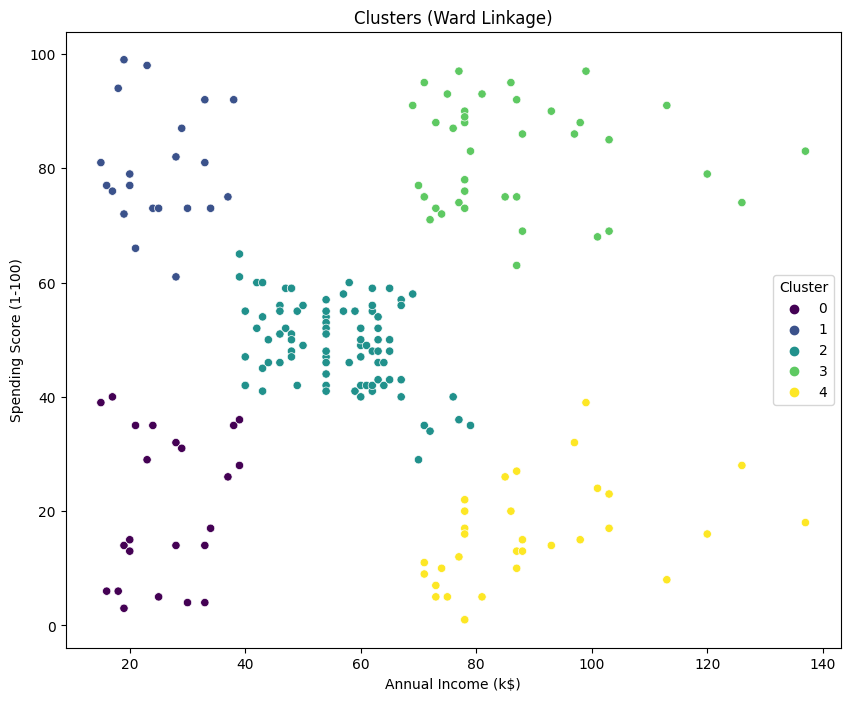

Cluster Means:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 26.304348               20.913043
1                 25.095238               80.047619
2                 55.811765               49.129412
3                 86.538462               82.128205
4                 89.406250               15.593750


In [ ]:
import seaborn as sns

data['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters (Ward Linkage)')
plt.show()

cluster_means = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Means:\n", cluster_means)